In [56]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from env import user, password, host
import env
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import csv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import acquire

iris_df = acquire.get_iris_data()


In [30]:
iris_df

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
5,1,6,5.4,3.9,1.7,0.4,setosa
6,1,7,4.6,3.4,1.4,0.3,setosa
7,1,8,5.0,3.4,1.5,0.2,setosa
8,1,9,4.4,2.9,1.4,0.2,setosa
9,1,10,4.9,3.1,1.5,0.1,setosa


In [33]:
def cluster(target):
    X = target[['petal_length', 'sepal_length']]
    with plt.style.context('seaborn-whitegrid'):
    #graph size
        plt.figure(figsize=(9, 6))
        pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Change in inertia as k increases')
        kmeans = KMeans(n_clusters=3)
    kmeans.fit(X)

    kmeans.predict(X)
    target['cluster']= kmeans.predict(X)

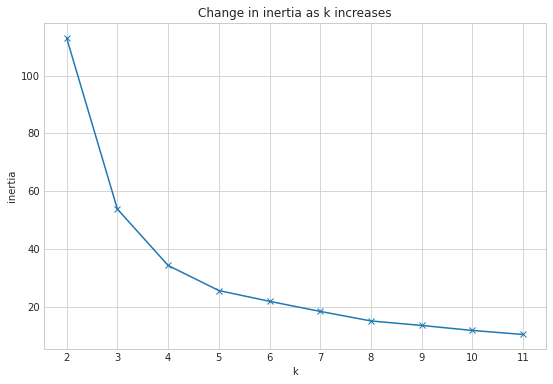

In [34]:
cluster(iris_df)

In [35]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [36]:
iris_df['cluster'] = kmeans.predict(X)


In [37]:
iris_df.groupby('species_name').mean()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,cluster
species_name,,,,,,,
setosa,1.0,25.5,5.006,3.428,1.462,0.246,1.00
versicolor,2.0,75.5,5.936,2.770,4.260,1.326,0.18
virginica,3.0,125.5,6.588,2.974,5.552,2.026,1.48


[Text(0.5, 1.0, 'K-Means Clusters')]

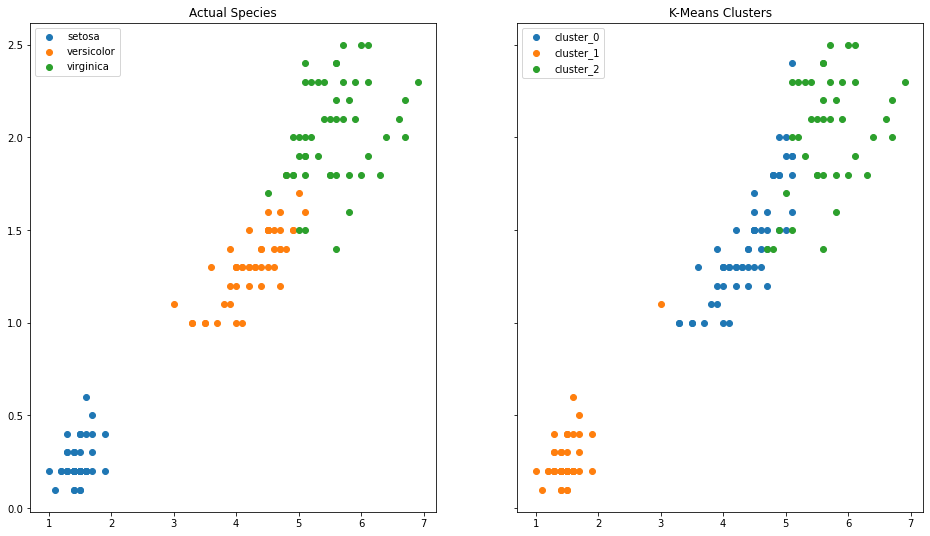

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in iris_df.groupby('species_name'):
    axs[0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in iris_df.cluster.sort_values().unique():
    axs[1].scatter(iris_df[iris_df.cluster == cluster_n].petal_length, iris_df[iris_df.cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

In [45]:
kmeans.cluster_centers_


array([[4.39310345, 5.87413793],
       [1.49215686, 5.00784314],
       [5.67804878, 6.83902439]])

In [46]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids


,petal_length,sepal_length
0,4.393103,5.874138
1,1.492157,5.007843
2,5.678049,6.839024


In [48]:
iris_df.groupby('cluster')['petal_length', 'sepal_length'].mean()


,petal_length,sepal_length
cluster,,
0,4.393103,5.874138
1,1.492157,5.007843
2,5.678049,6.839024


Text(0.5, 1.0, 'Visualizing Cluster Centers')

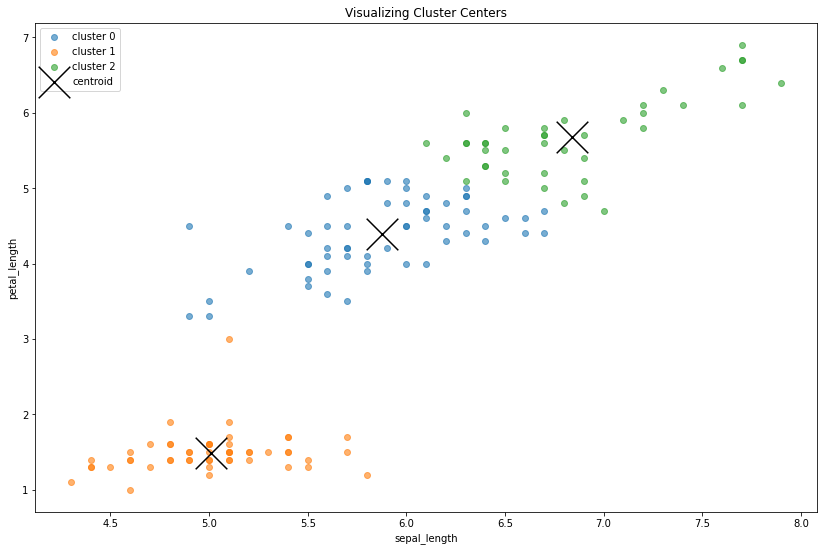

In [49]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris_df.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')


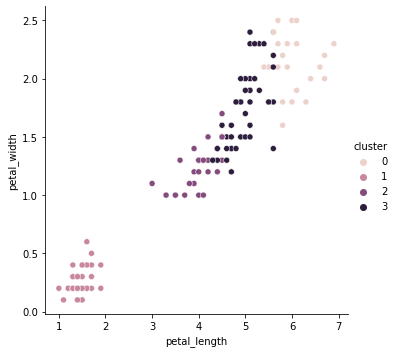

In [50]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)

sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')


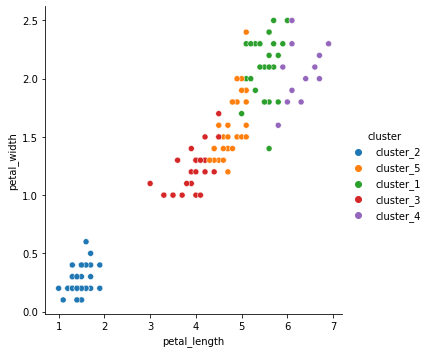

In [51]:
kmeans = KMeans(n_clusters=5).fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster_' + (iris.cluster + 1).astype('str')
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')


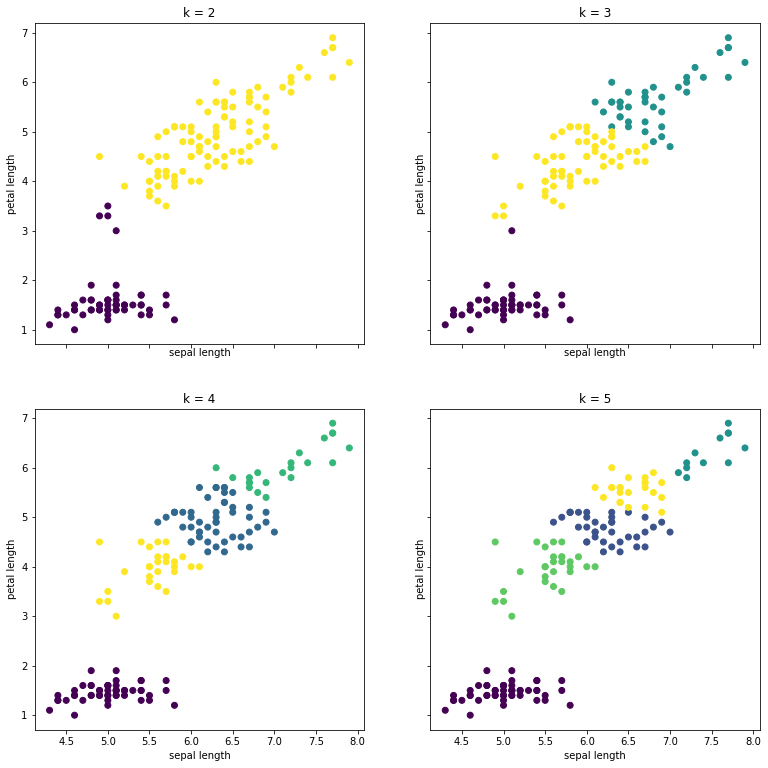

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')


In [ ]:
def cluster(target):
    X = target[['petal_length', 'sepal_length']]
    with plt.style.context('seaborn-whitegrid'):
    #graph size
        plt.figure(figsize=(9, 6))
        pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Change in inertia as k increases')
        kmeans = KMeans(n_clusters=3)
    kmeans.fit(X)

    kmeans.predict(X)
    target['cluster']= kmeans.predict(X)

# Scaled

In [57]:
train_validate, iris_test = train_test_split(iris_df, test_size=.2, random_state=123)
iris_train, iris_validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [60]:
def scale_data(iris_train,iris_validate,iris_test,cols):
    #make the scaler
    scaler = MinMaxScaler()
    #fit the scaler at train data only
    scaler.fit(iris_train[cols])
    #tranforrm train, validate and test
    iris_train_scaled = scaler.transform(iris_train[cols])
    iris_validate_scaled = scaler.transform(iris_validate[cols])
    iris_test_scaled = scaler.transform(iris_test[cols])
    
    # Generate a list of the new column names with _scaled added on
    scaled_columns = [col+"_scaled" for col in cols]
    
    #concatenate with orginal train, validate and test
    scaled_train = pd.concat([iris_train.reset_index(drop = True),pd.DataFrame(iris_train_scaled,columns = scaled_columns)],axis = 1)
    scaled_validate = pd.concat([iris_validate.reset_index(drop = True),pd.DataFrame(iris_validate_scaled, columns = scaled_columns)], axis = 1)
    scaled_test= pd.concat([iris_test.reset_index(drop = True),pd.DataFrame(iris_test_scaled,columns = scaled_columns)],axis = 1)
    
    return scaled_train,scaled_validate,scaled_test

In [61]:
train_scaled, val_scaled, test_scaled = scale_data(iris_train,iris_validate,iris_test,cols=['petal_length', 'sepal_length'])
train_scaled.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,petal_length_scaled,sepal_length_scaled
0,2,57,6.3,3.3,4.7,1.6,versicolor,0.649123,0.529412
1,1,41,5.0,3.5,1.3,0.3,setosa,0.052632,0.147059
2,2,71,5.9,3.2,4.8,1.8,versicolor,0.666667,0.411765
3,1,24,5.1,3.3,1.7,0.5,setosa,0.122807,0.176471
4,3,140,6.9,3.1,5.4,2.1,virginica,0.771930,0.705882
